# **My learnings while working on this assignment**

#### This assignment provided me the chance to work practically with Named Entity Recognition and apply it in a real world application
#### Also documenting each step along the way taught me the importance of learning while implementing, lasts a long time

# **Importing Pandas for loading dataset**
### Using the pandas.read_csv() we can read a csv file as a dataframe

In [72]:
import pandas as pd 
path_fake_gc = 'gossipcop_fake.csv'
path_real_gc = 'gossipcop_real.csv'
path_fake_pol = 'politifact_fake.csv'
path_real_pol = 'politifact_real.csv'

gc_fake = pd.read_csv(path_fake_gc)
gc_real = pd.read_csv(path_real_gc)

pol_real = pd.read_csv(path_real_pol)
pol_fake = pd.read_csv(path_fake_pol)


# **Preprocessing Tasks**

### Conduct necessary preprocessing steps on the text, including:
### – Removing unnecessary whitespace, HTML tags, and special characters.
### – Normalizing text (convert to lowercase).
### – Tokenizing the text and removing stop words using libraries like NLTK or SpaCy.
<br></br>
### We will first check for missing values and duplicated values using the *isnull()* function

In [19]:
print("Gossip Cop fake number of missing values : \n",gc_fake.isnull().sum())
print()
print("Gossip Cop real number of missing values : \n",gc_real.isnull().sum())
print()
print("Politik Cop fake number of missing values : \n",pol_fake.isnull().sum())
print()
print("Politik Cop real number of missing values : \n",pol_real.isnull().sum())
print()

Gossip Cop fake number of missing values : 
 id             0
news_url     256
title          0
tweet_ids    188
dtype: int64

Gossip Cop real number of missing values : 
 id              0
news_url       13
title           0
tweet_ids    1058
dtype: int64

Politik Cop fake number of missing values : 
 id            0
news_url      4
title         0
tweet_ids    40
dtype: int64

Politik Cop real number of missing values : 
 id             0
news_url      57
title          0
tweet_ids    215
dtype: int64



## **Finding the shape and using .head() to see the dataset**

In [20]:
print(gc_real.shape)
print(gc_real.columns)
gc_real.head()

(16817, 4)
Index(['id', 'news_url', 'title', 'tweet_ids'], dtype='object')


,id,news_url,title,tweet_ids
0,gossipcop-882573,https://www.brides.com/story/teen-mom-jenelle-...,Teen Mom Star Jenelle Evans' Wedding Dress Is ...,912371411146149888\t912371528343408641\t912372...
1,gossipcop-875924,https://www.dailymail.co.uk/tvshowbiz/article-...,Kylie Jenner refusing to discuss Tyga on Life ...,901989917546426369\t901989992074969089\t901990...
2,gossipcop-894416,https://en.wikipedia.org/wiki/Quinn_Perkins,Quinn Perkins,931263637246881792\t931265332022579201\t931265...
3,gossipcop-857248,https://www.refinery29.com/en-us/2018/03/19192...,I Tried Kim Kardashian's Butt Workout & Am For...,868114761723936769\t868122567910936576\t868128...
4,gossipcop-884684,https://www.cnn.com/2017/10/04/entertainment/c...,Celine Dion donates concert proceeds to Vegas ...,915528047004209152\t915529285171122176\t915530...


In [22]:
print(pol_real.shape)
print(pol_real.columns)
pol_real.head()

(624, 4)
Index(['id', 'news_url', 'title', 'tweet_ids'], dtype='object')


,id,news_url,title,tweet_ids
0,politifact14984,http://www.nfib-sbet.org/,National Federation of Independent Business,967132259869487105\t967164368768196609\t967215...
1,politifact12944,http://www.cq.com/doc/newsmakertranscripts-494...,comments in Fayetteville NC,942953459\t8980098198\t16253717352\t1668513250...
2,politifact333,https://web.archive.org/web/20080204072132/htt...,"Romney makes pitch, hoping to close deal : Ele...",NaN
3,politifact4358,https://web.archive.org/web/20110811143753/htt...,Democratic Leaders Say House Democrats Are Uni...,NaN
4,politifact779,https://web.archive.org/web/20070820164107/htt...,"Budget of the United States Government, FY 2008",89804710374154240\t91270460595109888\t96039619...


### **Creating and Setting a label field and setting it True/False depending on the Dataset**

In [23]:
gc_fake['label'] = 'fake'
gc_fake['source'] = 'GossipCop'

gc_real['label'] = 'real'
gc_real['source'] = 'GossipCop'

pol_fake['label'] = 'fake'
pol_fake['source'] = 'Politifact'

pol_real['label'] = 'real'
pol_real['source'] = 'Politifact'

## Combining all the real and fake datasets using pandas.concat()

In [25]:
all_df = pd.concat([gc_fake, gc_real, pol_fake, pol_real], ignore_index=True)
all_df.head()

,id,news_url,title,tweet_ids,label,source
0,gossipcop-2493749932,www.dailymail.co.uk/tvshowbiz/article-5874213/...,Did Miley Cyrus and Liam Hemsworth secretly ge...,284329075902926848\t284332744559968256\t284335...,fake,GossipCop
1,gossipcop-4580247171,hollywoodlife.com/2018/05/05/paris-jackson-car...,Paris Jackson & Cara Delevingne Enjoy Night Ou...,992895508267130880\t992897935418503169\t992899...,fake,GossipCop
2,gossipcop-941805037,variety.com/2017/biz/news/tax-march-donald-tru...,Celebrities Join Tax March in Protest of Donal...,853359353532829696\t853359576543920128\t853359...,fake,GossipCop
3,gossipcop-2547891536,www.dailymail.co.uk/femail/article-3499192/Do-...,Cindy Crawford's daughter Kaia Gerber wears a ...,988821905196158981\t988824206556172288\t988825...,fake,GossipCop
4,gossipcop-5476631226,variety.com/2018/film/news/list-2018-oscar-nom...,Full List of 2018 Oscar Nominations – Variety,955792793632432131\t955795063925301249\t955798...,fake,GossipCop


In [33]:
print("The shape of the combined dataset is:",all_df.shape)

The shape of the combined dataset is: (23196, 6)


## **Handling missing values and dropping them from entire dataset**

In [35]:
all_df.isna().sum()

id              0
news_url      330
title           0
tweet_ids    1501
label           0
source          0
dtype: int64

In [38]:
# Dropping missing values
all_df.dropna(inplace=True)

In [41]:
print(all_df.shape)

(21407, 6)


## **Dealing with tweetsids**
#### These are the ids of the tweets related to the original news, we can use them further but for now they add complexity to the dataset

In [42]:
print(all_df['tweet_ids'][0])

284329075902926848	284332744559968256	284335412590297089	284359918792880128	284385385151332353	284456388833452032	284644878267318273	284656558963564545	284705391965794304	284705391957401601	284762425553723392	284766089827721217	284769766806257664	284769769490620416	284769775442337792	284769772980301824	284769778655186944	284769777073917952	284771913753042944	284902943201837056	284918939975303169	285592266716884993	285635421872979969	285635516924301313	285731324101287937	295954533555793920	296639632710459392	296651276626825216	700137152143699968	700501642412560384	700599457767890944	700925213031141376	757598980373045248	757614017808437248	757810204448743425	757855454886293504	818454872299163649	818532208990371841	818622382524997632	818623644737871872	824328059335692290	840237926642536449	840277988067430400	840305556736872448	840312641042104320	840320383437877248	840321378150670336	840325449389600768	840346792671698945	840359115754999810	840359140119699457	840366459675062274	840396881586

In [45]:
all_df = all_df.drop('tweet_ids',axis=1)

(21407, 5)

In [46]:
all_df.head()

,id,news_url,title,label,source
0,gossipcop-2493749932,www.dailymail.co.uk/tvshowbiz/article-5874213/...,Did Miley Cyrus and Liam Hemsworth secretly ge...,fake,GossipCop
1,gossipcop-4580247171,hollywoodlife.com/2018/05/05/paris-jackson-car...,Paris Jackson & Cara Delevingne Enjoy Night Ou...,fake,GossipCop
2,gossipcop-941805037,variety.com/2017/biz/news/tax-march-donald-tru...,Celebrities Join Tax March in Protest of Donal...,fake,GossipCop
3,gossipcop-2547891536,www.dailymail.co.uk/femail/article-3499192/Do-...,Cindy Crawford's daughter Kaia Gerber wears a ...,fake,GossipCop
4,gossipcop-5476631226,variety.com/2018/film/news/list-2018-oscar-nom...,Full List of 2018 Oscar Nominations – Variety,fake,GossipCop


# **Text Preprocessing**
#### – Removing unnecessary whitespace, HTML tags, and special characters.
#### – Normalizing text (convert to lowercase).
#### – Tokenizing the text and removing stop words using libraries like NLTK or SpaCy

#### Importing the libraries

In [47]:
import pandas as pd
import re
import spacy
from nltk.corpus import stopwords
import nltk

In [50]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Load the spacy model as specified in the assignment, using the en_core_web_sm

nlp = spacy.load("en_core_web_sm")
# This function cleans text
def text_cleaner(text):
    text = re.sub(r'<.*?>', '', text)  # Remove HTML tags
    
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove non-alphabet characters
    
    text = text.lower()  # To lowercase
    return text

# Tokenize and remove stop words
def preprocess_text(text):
    # Clean text
    text = text_cleaner(text)
    # Use spaCy for tokenization
    doc = nlp(text)
    # Remove stop words and single characters
    tokens = [token.text for token in doc if token.text not in stop_words and len(token.text) > 1]
    return ' '.join(tokens)

all_df['cleaned_title'] = all_df['title'].apply(preprocess_text)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\angad\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


#### Printing and seeing the cleaned title field comparing with not cleaned title field 

In [51]:
print(all_df[['title', 'cleaned_title']].head())

                                               title  \
0  Did Miley Cyrus and Liam Hemsworth secretly ge...   
1  Paris Jackson & Cara Delevingne Enjoy Night Ou...   
2  Celebrities Join Tax March in Protest of Donal...   
3  Cindy Crawford's daughter Kaia Gerber wears a ...   
4      Full List of 2018 Oscar Nominations – Variety   

                                       cleaned_title  
0    miley cyrus liam hemsworth secretly get married  
1  paris jackson cara delevingne enjoy night matc...  
2    celebrities join tax march protest donald trump  
3  cindy crawfords daughter kaia gerber wears wig...  
4                full list oscar nominations variety  


# Named Entity Recognition and Feature Engineering Steps

#### Counting the number of entities, and the entities can either be an orgainsation, location or names of people

In [52]:
import spacy

nlp = spacy.load("en_core_web_sm")

def extract_entity_counts(text):
    doc = nlp(text)
    org_count = sum(1 for ent in doc.ents if ent.label_ == "ORG")  # Count organizations
    gpe_count = sum(1 for ent in doc.ents if ent.label_ == "GPE")  # Count locations
    person_count = sum(1 for ent in doc.ents if ent.label_ == "PERSON")  # Count people
    return org_count, gpe_count, person_count


all_df[['count_ORG', 'count_GPE', 'count_PERSON']] = all_df['cleaned_title'].apply(
    lambda x: pd.Series(extract_entity_counts(x))
)


print(all_df[['cleaned_title', 'count_ORG', 'count_GPE', 'count_PERSON']].head())

                                       cleaned_title  count_ORG  count_GPE  \
0    miley cyrus liam hemsworth secretly get married          0          0   
1  paris jackson cara delevingne enjoy night matc...          0          1   
2    celebrities join tax march protest donald trump          1          0   
3  cindy crawfords daughter kaia gerber wears wig...          1          0   
4                full list oscar nominations variety          0          0   

   count_PERSON  
0             2  
1             1  
2             1  
3             2  
4             0  


## **Feature Engineering**
#### Article Length
#### Sentiment Analysis
#### Subjectivity/Objectivity 

In [53]:
import pandas as pd
from textblob import TextBlob

# Calculate Article Length (Total Word Count)
def calculate_word_count(text):
    return len(text.split())

all_df['article_length'] = all_df['cleaned_title'].apply(calculate_word_count)

# Sentiment Analysis (Using TextBlob)
def get_sentiment_scores(text):
    blob = TextBlob(text)
    polarity = blob.sentiment.polarity  
    subjectivity = blob.sentiment.subjectivity  # 0 (objective) to 1 (subjective)
    return polarity, subjectivity

all_df[['sentiment_polarity', 'sentiment_subjectivity']] = all_df['cleaned_title'].apply(
    lambda x: pd.Series(get_sentiment_scores(x))
)

# 3. Entity Density Features
# Avoid division by zero by setting density to zero if the article length is zero
all_df['density_ORG'] = all_df['count_ORG'] / all_df['article_length'].replace(0, 1)
all_df['density_GPE'] = all_df['count_GPE'] / all_df['article_length'].replace(0, 1)
all_df['density_PERSON'] = all_df['count_PERSON'] / all_df['article_length'].replace(0, 1)

# Additional Sentiment-Entity Interaction Features (Example)
# Multiply sentiment polarity with entity counts to capture interaction
all_df['polarity_ORG_interaction'] = all_df['sentiment_polarity'] * all_df['count_ORG']
all_df['polarity_GPE_interaction'] = all_df['sentiment_polarity'] * all_df['count_GPE']
all_df['polarity_PERSON_interaction'] = all_df['sentiment_polarity'] * all_df['count_PERSON']

In [57]:
print(all_df.columns)
all_df.head()

Index(['id', 'news_url', 'title', 'label', 'source', 'cleaned_title',
       'count_ORG', 'count_GPE', 'count_PERSON', 'article_length',
       'sentiment_polarity', 'sentiment_subjectivity', 'density_ORG',
       'density_GPE', 'density_PERSON', 'polarity_ORG_interaction',
       'polarity_GPE_interaction', 'polarity_PERSON_interaction'],
      dtype='object')


,id,news_url,title,label,source,cleaned_title,count_ORG,count_GPE,count_PERSON,article_length,sentiment_polarity,sentiment_subjectivity,density_ORG,density_GPE,density_PERSON,polarity_ORG_interaction,polarity_GPE_interaction,polarity_PERSON_interaction
0,gossipcop-2493749932,www.dailymail.co.uk/tvshowbiz/article-5874213/...,Did Miley Cyrus and Liam Hemsworth secretly ge...,fake,GossipCop,miley cyrus liam hemsworth secretly get married,0,0,2,7,-0.075,0.475,0.000000,0.0,0.285714,-0.0,-0.0,-0.15
1,gossipcop-4580247171,hollywoodlife.com/2018/05/05/paris-jackson-car...,Paris Jackson & Cara Delevingne Enjoy Night Ou...,fake,GossipCop,paris jackson cara delevingne enjoy night matc...,0,1,1,10,0.500,0.700,0.000000,0.1,0.100000,0.0,0.5,0.50
2,gossipcop-941805037,variety.com/2017/biz/news/tax-march-donald-tru...,Celebrities Join Tax March in Protest of Donal...,fake,GossipCop,celebrities join tax march protest donald trump,1,0,1,7,0.000,0.000,0.142857,0.0,0.142857,0.0,0.0,0.00
3,gossipcop-2547891536,www.dailymail.co.uk/femail/article-3499192/Do-...,Cindy Crawford's daughter Kaia Gerber wears a ...,fake,GossipCop,cindy crawfords daughter kaia gerber wears wig...,1,0,2,10,0.000,0.000,0.100000,0.0,0.200000,0.0,0.0,0.00
4,gossipcop-5476631226,variety.com/2018/film/news/list-2018-oscar-nom...,Full List of 2018 Oscar Nominations – Variety,fake,GossipCop,full list oscar nominations variety,0,0,0,5,0.350,0.550,0.000000,0.0,0.000000,0.0,0.0,0.00


# **Predictive Modelling and Plotting**

--- Logistic Regression ---
Accuracy: 0.7534
Classification Report:
              precision    recall  f1-score   support

        fake       0.33      0.00      0.00      1055
        real       0.75      1.00      0.86      3227

    accuracy                           0.75      4282
   macro avg       0.54      0.50      0.43      4282
weighted avg       0.65      0.75      0.65      4282

Confusion Matrix:
[[   1 1054]
 [   2 3225]]


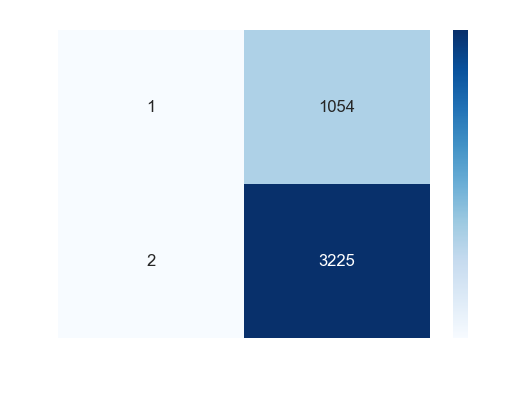

--- Random Forest Classifier ---
Accuracy: 0.7401
Classification Report:
              precision    recall  f1-score   support

        fake       0.41      0.13      0.20      1055
        real       0.77      0.94      0.84      3227

    accuracy                           0.74      4282
   macro avg       0.59      0.54      0.52      4282
weighted avg       0.68      0.74      0.69      4282

Confusion Matrix:
[[ 141  914]
 [ 199 3028]]


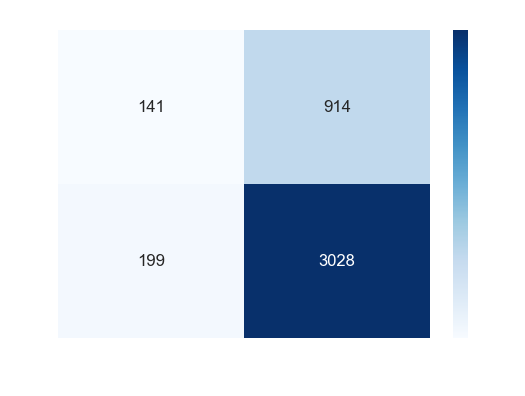

--- Tuned Random Forest Classifier ---
Accuracy: 0.7567
Classification Report:
              precision    recall  f1-score   support

        fake       0.67      0.02      0.05      1055
        real       0.76      1.00      0.86      3227

    accuracy                           0.76      4282
   macro avg       0.71      0.51      0.45      4282
weighted avg       0.74      0.76      0.66      4282

Confusion Matrix:
[[  26 1029]
 [  13 3214]]


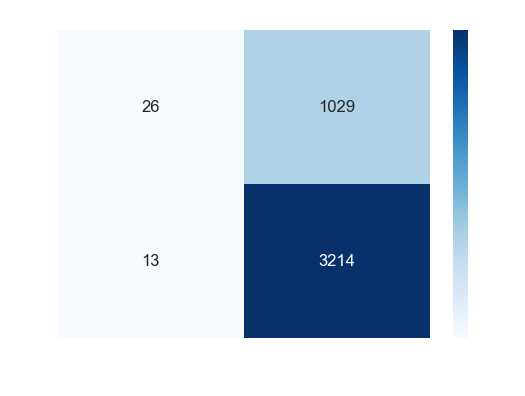

In [71]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Prepare the Feature Set and Target
X = all_df[['article_length', 'sentiment_polarity', 'sentiment_subjectivity',
                 'count_ORG', 'count_GPE', 'count_PERSON', 
                 'density_ORG', 'density_GPE', 'density_PERSON',
                 'polarity_ORG_interaction', 'polarity_GPE_interaction', 'polarity_PERSON_interaction']]
y = all_df['label']  # Target column

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Train Models
# Logistic Regression
lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Random Forest Classifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# 3. Evaluate Models
def evaluate_model(y_test, y_pred, model_name):
    accuracy = accuracy_score(y_test, y_pred)
    print(f"--- {model_name} ---")
    print(f"Accuracy: {accuracy:.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

    # Plot Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
    plt.title(f"Confusion Matrix: {model_name}")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

# Evaluate Logistic Regression
evaluate_model(y_test, y_pred_lr, "Logistic Regression")

# Evaluate Random Forest Classifier
evaluate_model(y_test, y_pred_rf, "Random Forest Classifier")

# 4. Hyperparameter Tuning for Random Forest (Optional)
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best model from grid search
best_rf = grid_search.best_estimator_
y_pred_best_rf = best_rf.predict(X_test)

# Evaluate the best Random Forest model
evaluate_model(y_test, y_pred_best_rf, "Tuned Random Forest Classifier")

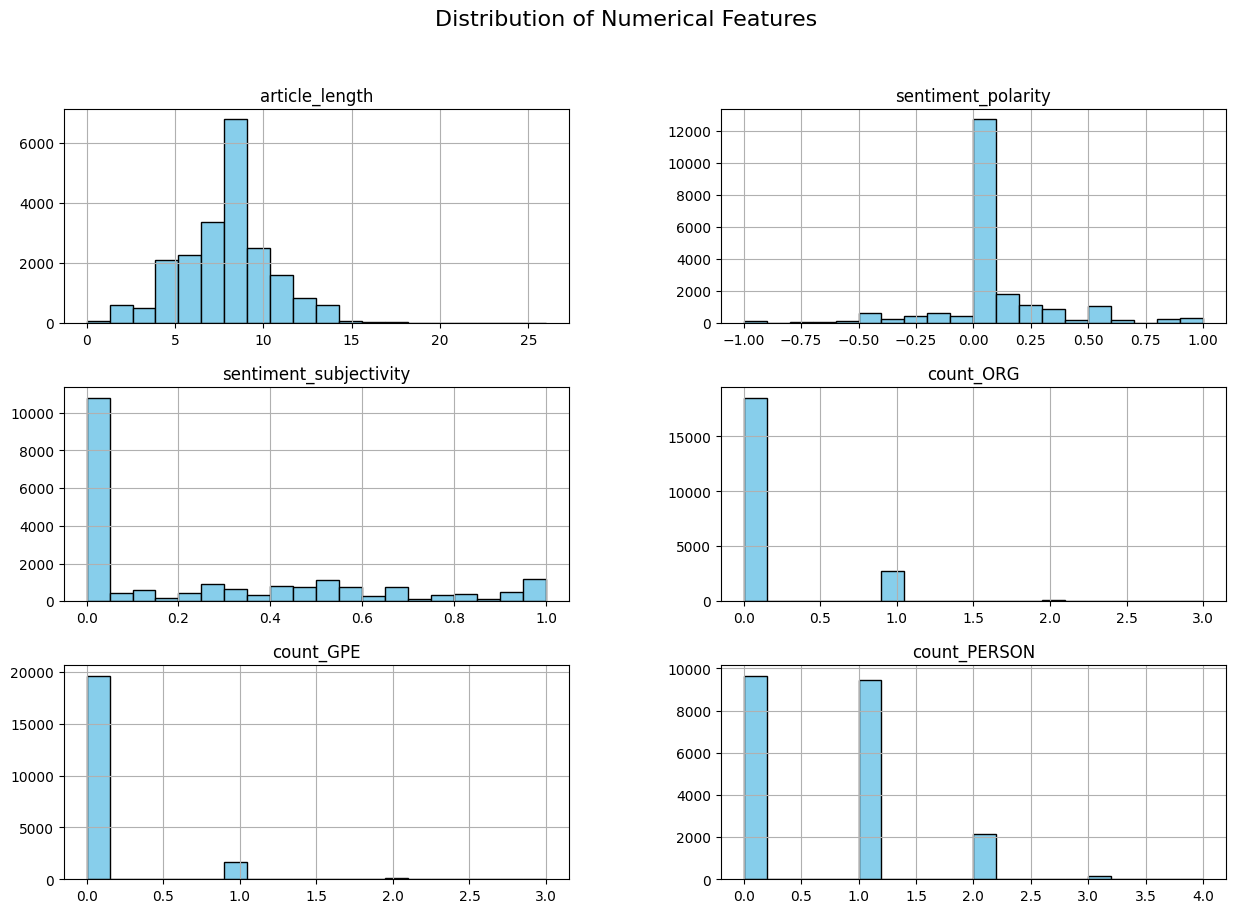

In [59]:
import matplotlib.pyplot as plt

# Plot distributions for numeric features
numeric_features = ['article_length', 'sentiment_polarity', 'sentiment_subjectivity',
                    'count_ORG', 'count_GPE', 'count_PERSON']

all_df[numeric_features].hist(bins=20, figsize=(15, 10), color='skyblue', edgecolor='black')
plt.suptitle("Distribution of Numerical Features", fontsize=16)
plt.show()

C:\Users\angad\AppData\Local\Temp\ipykernel_4064\4227117601.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=all_df, x='label', palette='Set2')


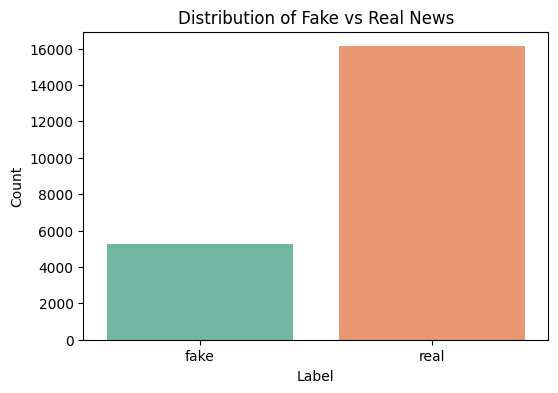

In [60]:
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.countplot(data=all_df, x='label', palette='Set2')
plt.title("Distribution of Fake vs Real News")
plt.xlabel("Label")
plt.ylabel("Count")
plt.show()

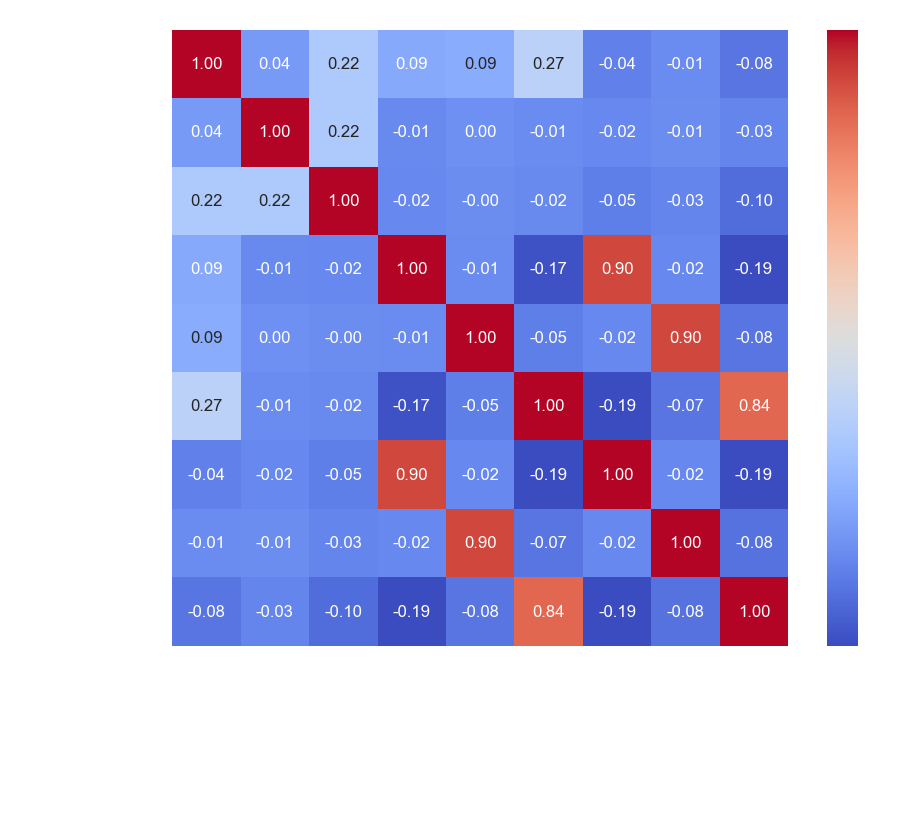

In [76]:
plt.figure(figsize=(10, 8))
correlation_matrix = all_df[numeric_features + ['density_ORG', 'density_GPE', 'density_PERSON']].corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title("Correlation Matrix of Features")
plt.show()


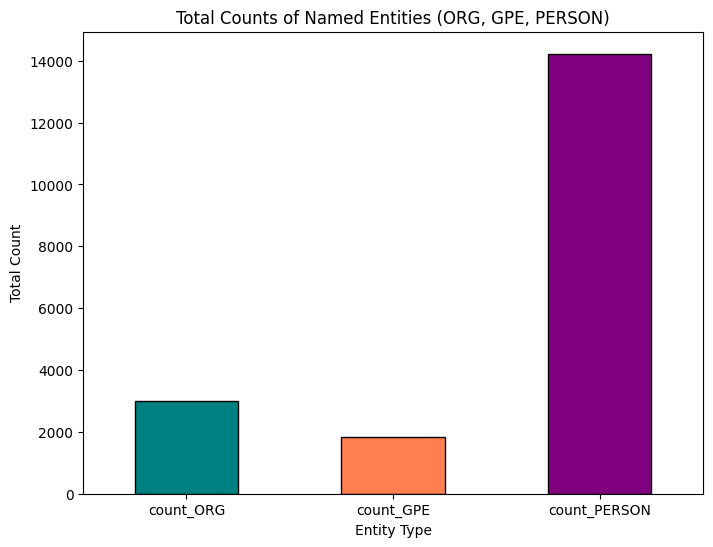

In [62]:
entity_features = ['count_ORG', 'count_GPE', 'count_PERSON']

plt.figure(figsize=(8, 6))
all_df[entity_features].sum().plot(kind='bar', color=['teal', 'coral', 'purple'], edgecolor='black')
plt.title("Total Counts of Named Entities (ORG, GPE, PERSON)")
plt.xlabel("Entity Type")
plt.ylabel("Total Count")
plt.xticks(rotation=0)
plt.show()


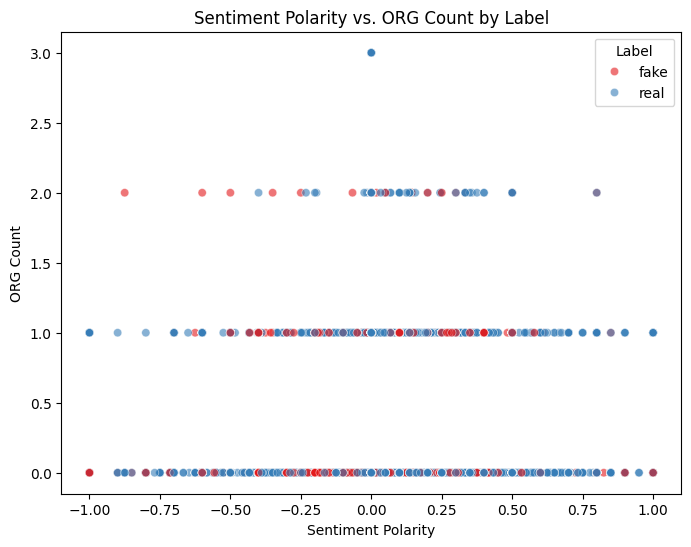

In [63]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=all_df, x='sentiment_polarity', y='count_ORG', hue='label', palette='Set1', alpha=0.6)
plt.title("Sentiment Polarity vs. ORG Count by Label")
plt.xlabel("Sentiment Polarity")
plt.ylabel("ORG Count")
plt.legend(title="Label")
plt.show()


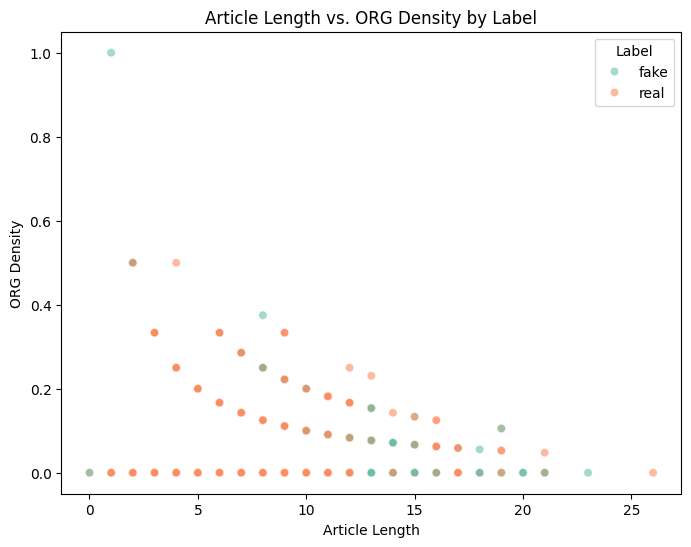

In [64]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=all_df, x='article_length', y='density_ORG', hue='label', palette='Set2', alpha=0.6)
plt.title("Article Length vs. ORG Density by Label")
plt.xlabel("Article Length")
plt.ylabel("ORG Density")
plt.legend(title="Label")
plt.show()


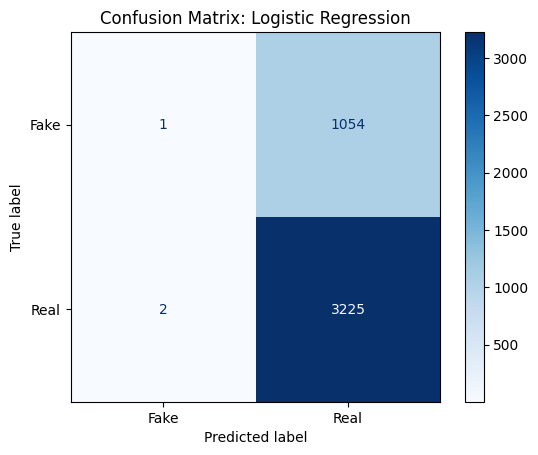

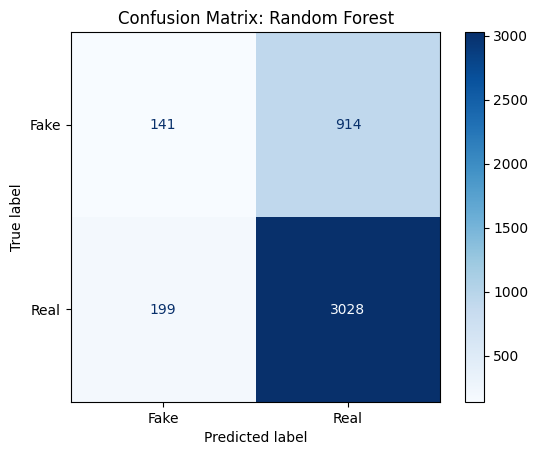

In [65]:
from sklearn.metrics import ConfusionMatrixDisplay

# Display confusion matrix for Logistic Regression
disp_lr = ConfusionMatrixDisplay.from_estimator(lr, X_test, y_test, display_labels=['Fake', 'Real'], cmap='Blues')
disp_lr.ax_.set_title("Confusion Matrix: Logistic Regression")
plt.show()

# Display confusion matrix for Random Forest
disp_rf = ConfusionMatrixDisplay.from_estimator(rf, X_test, y_test, display_labels=['Fake', 'Real'], cmap='Blues')
disp_rf.ax_.set_title("Confusion Matrix: Random Forest")
plt.show()
